In [468]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [473]:
%run variables_functions.ipynb

# Creation of a df_plot

In [605]:
def convert_time(row):
    YYYY = row['Year']
    month = (row['Month']-1)/12
    return(YYYY+month)

df_panel['Time'] = df_panel.apply(lambda x: convert_time(x), axis = 1)

df_tool = df_panel.groupby(['Time']).mean()[['Coal_prices','Gas_prices','Demand_GWh',
                                               'Solar_Production_GWh','Wind_Production_GWh']].reset_index()
df_prod = df_panel.groupby(['Time']).sum()[['Production_GWh']]

In [606]:
plot_i = df_tool.join(df_prod, on = 'Time', how = 'left')

In [607]:
co2_ca = df_panel.where(df_panel.State == 'CA').dropna()[['Time','CO2_prices']].drop_duplicates()
co2_rggi_ = df_panel.where(df_panel.State == 'MA').dropna()[['Time','CO2_prices']].drop_duplicates()

co2_ca = co2_ca.rename(columns={"CO2_prices": "CO2_CA"})
co2_rggi_ = co2_rggi_.rename(columns={"CO2_prices":"CO2_RGGI"})

missing_prices_list = []
for date in co2_ca.Time.unique():
    if date not in co2_rggi_.Time.unique():
        missing_prices_list.append(date)

missing_prices = pd.DataFrame({'Time':missing_prices_list, 'CO2_RGGI':np.zeros(len(missing_prices_list))})
co2_rggi = co2_rggi_.append(missing_prices, ignore_index = True)

In [608]:
plot_ii = plot_i.join(co2_ca.set_index('Time'), on = 'Time', how = 'left')
df_plot_production = plot_ii.join(co2_rggi.set_index('Time'), on = 'Time', how = 'left')

In [609]:
df_plot_production.head(4)

,Time,Coal_prices,Gas_prices,Demand_GWh,Solar_Production_GWh,Wind_Production_GWh,Production_GWh,CO2_CA,CO2_RGGI
0,2008.916667,43.30,6.4407,343898.254469,0.279431,187.078925,1.677843e+08,0.0,3.725812
1,2009.000000,44.57,5.4807,354992.636209,0.084750,149.547623,1.719252e+08,0.0,3.725812
2,2009.083333,45.57,4.7999,300887.397691,0.423277,158.399673,1.409158e+08,0.0,3.725812
3,2009.166667,43.96,4.5772,310602.963809,1.079666,173.905319,1.355303e+08,0.0,3.869113


In [637]:
df_plot_production.to_csv('treated_data/Panel/coal_panel.csv',sep=';')

# Plot

In [283]:
df_plot.columns

Index(['Time', 'Coal_prices', 'Gas_prices', 'Demand_GWh',
       'Solar_Production_GWh', 'Wind_Production_GWh', 'Production_GWh',
       'CO2_CA', 'CO2_RGGI'],
      dtype='object')

In [284]:
time = df_plot.Time
coal_prices = df_plot.Coal_prices
gas_prices = df_plot.Gas_prices
co2_ca = df_plot.CO2_CA
co2_rggi = df_plot.CO2_RGGI
coal_production = df_plot.Production_GWh/1000
wind_production = df_plot.Wind_Production_GWh
solar_production = df_plot.Solar_Production_GWh
demand = df_plot.Demand_GWh

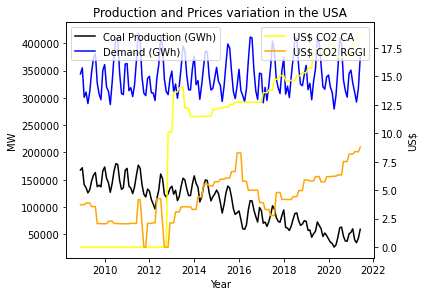

In [285]:
fig, ax1 = plt.subplots()


ax1.set_xlabel('Year')
ax1.set_ylabel('MW')
ax1.plot(time,coal_production , color='Black', label = 'Coal Production (GWh)')
ax1.plot(time,demand , color='Blue', label = 'Demand (GWh)')

ax1.legend(loc='upper left')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('US$')  # we already handled the x-label with ax1
ax2.plot(time, co2_ca, color='Yellow', label = 'US$ CO2 CA')
ax2.plot(time, co2_rggi, color='Orange', label = 'US$ CO2 RGGI')

ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Production and Prices variation in the USA')
plt.show()

# Coal Production

Text(0.5, 1.0, 'USA Production of Coal')

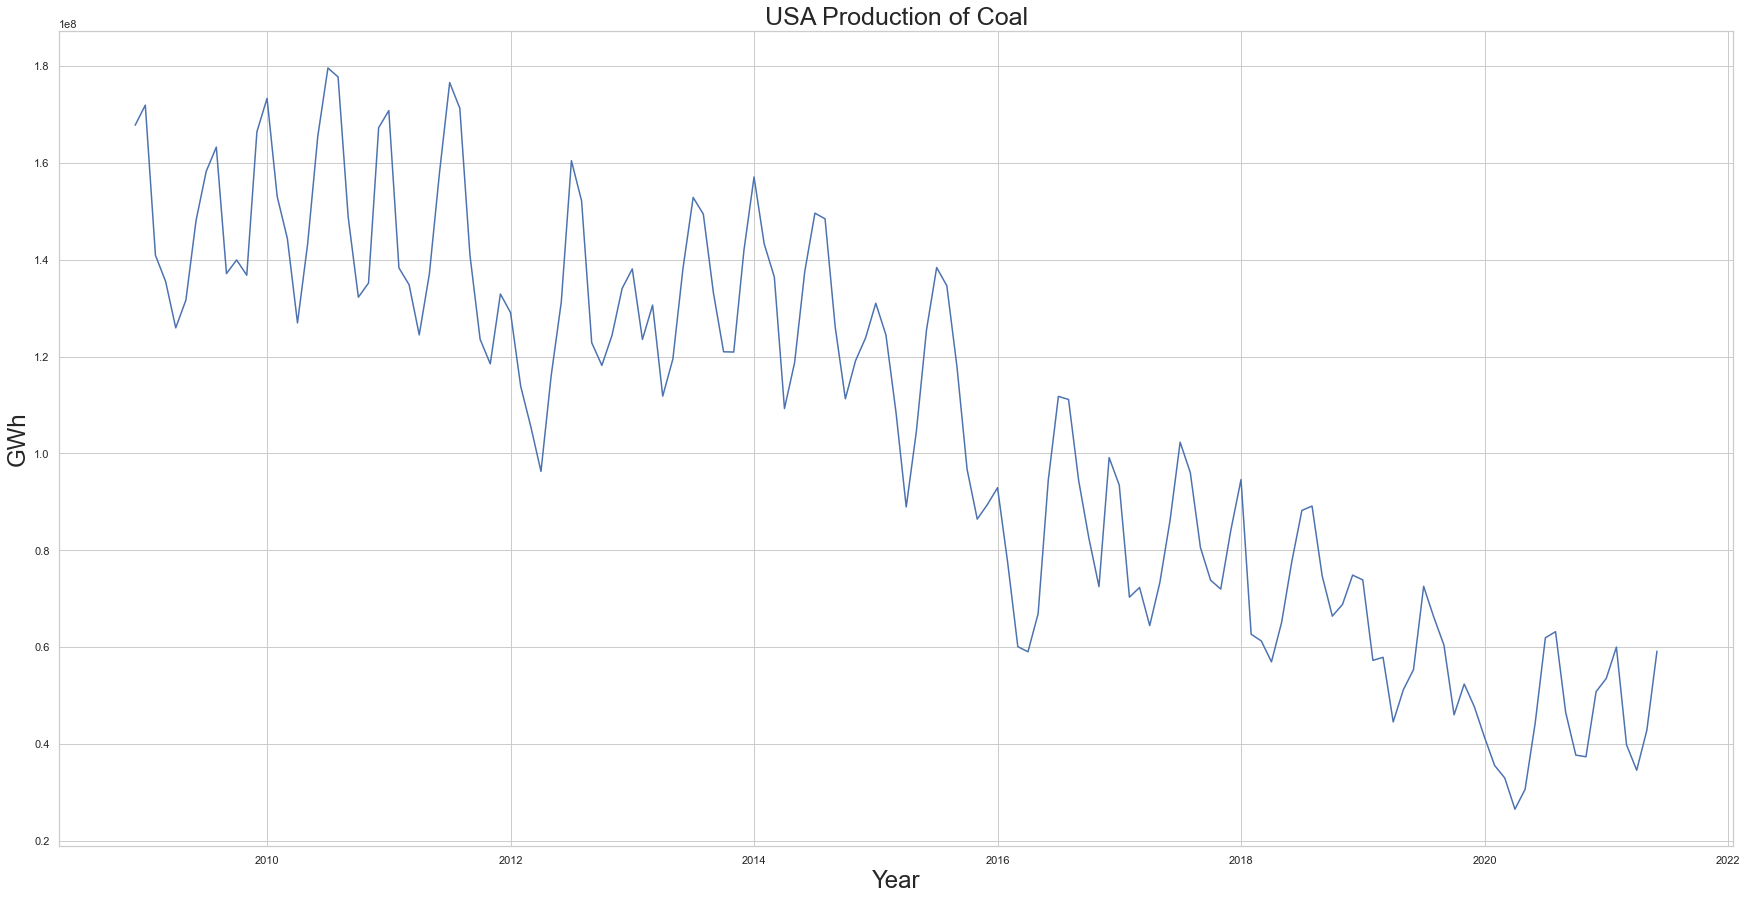

In [610]:
sns.set(style="whitegrid")
plot = sns.lineplot(x = 'Time', y = 'Production_GWh', data = df_plot_production)
plot.set_ylabel('GWh', size = 24)
plot.set_xlabel('Year', size = 24)
plot.set_title('USA Production of Coal',size = 25)

In [345]:
df_tool = df_panel.groupby(['Year','Month','State']).sum().reset_index()[['Year','Month','State','Production_GWh']]
df_tool['Time'] = df_tool.apply(lambda x : convert_time(x),axis=1)
df_tool = df_tool[['Time','State','Production_GWh']]
plot_prod_states = df_tool.pivot(index='Time', columns='State')['Production_GWh']

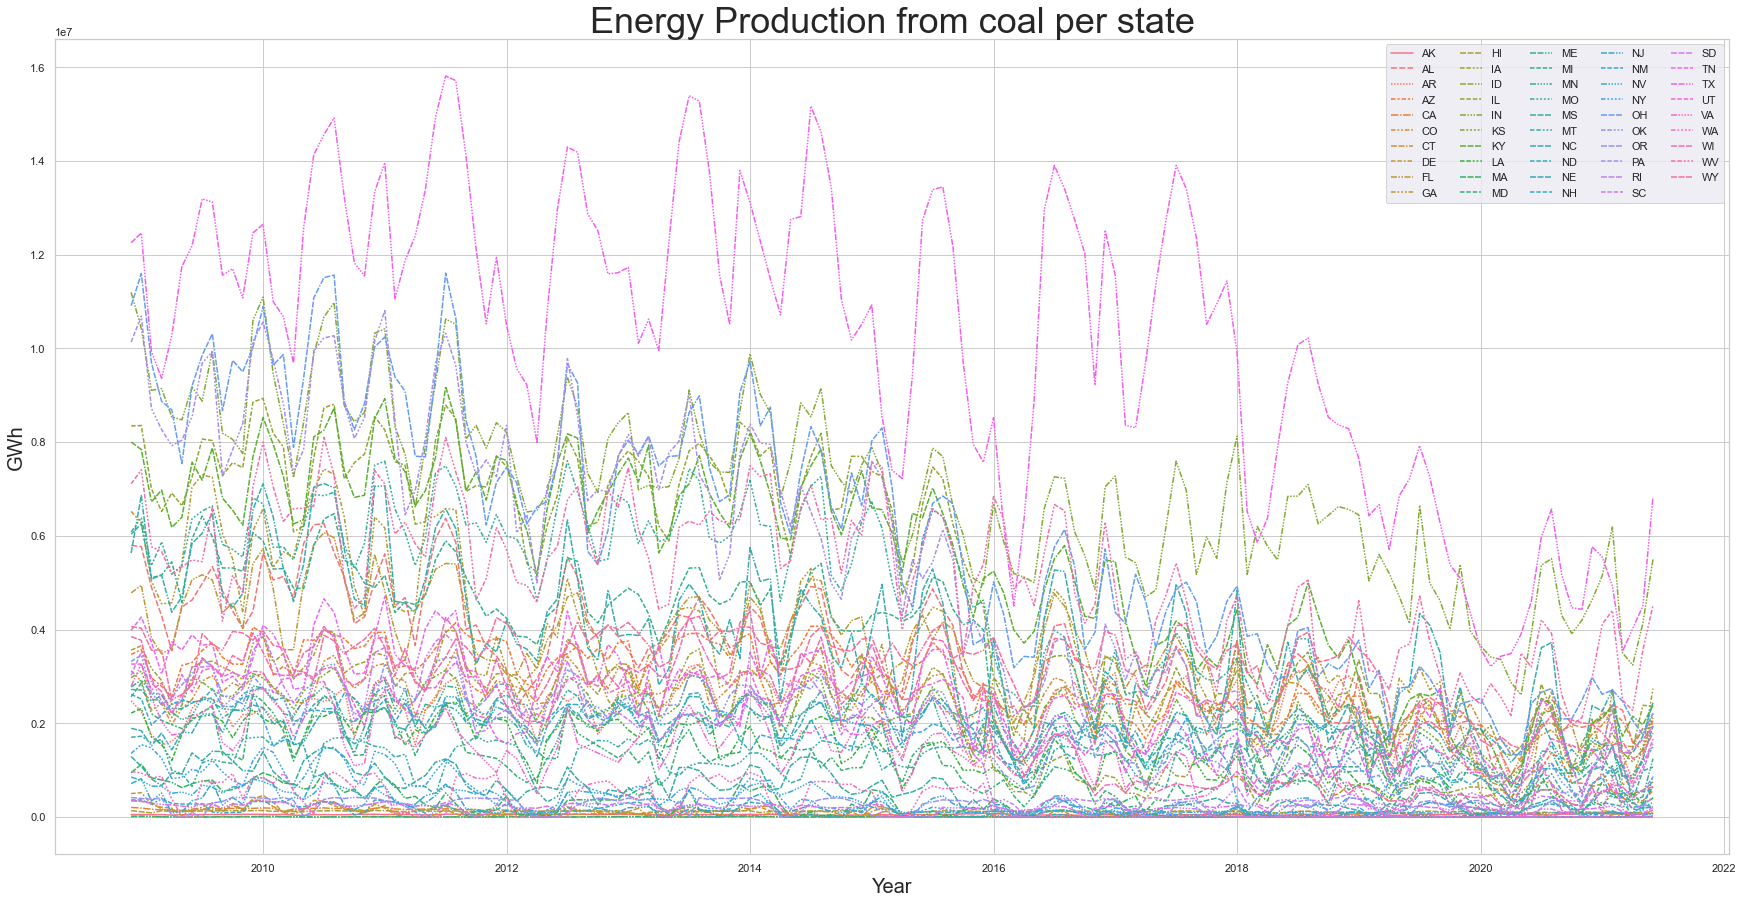

In [382]:
sns.set(style="whitegrid")
plot = sns.lineplot(data = plot_prod_states)
sns.set(rc={'figure.figsize':(30,15)})
plot.set_ylabel('GWh', size = 20)
plot.set_xlabel('Year', size = 20)
plot.set_title('Energy Production from coal per state', size = 36)

plot.legend(ncol=5) # you can specify any location parameter you want here

In [445]:
df_tool = df_panel.groupby(['Year','State']).sum().reset_index()[['Year','State','Production_GWh']]
df_tool = df_tool[['Year','State','Production_GWh']]
prod_states_year = df_tool.pivot(index='Year', columns='State')['Production_GWh']

Text(0.5, 1.0, 'Production per State USA')

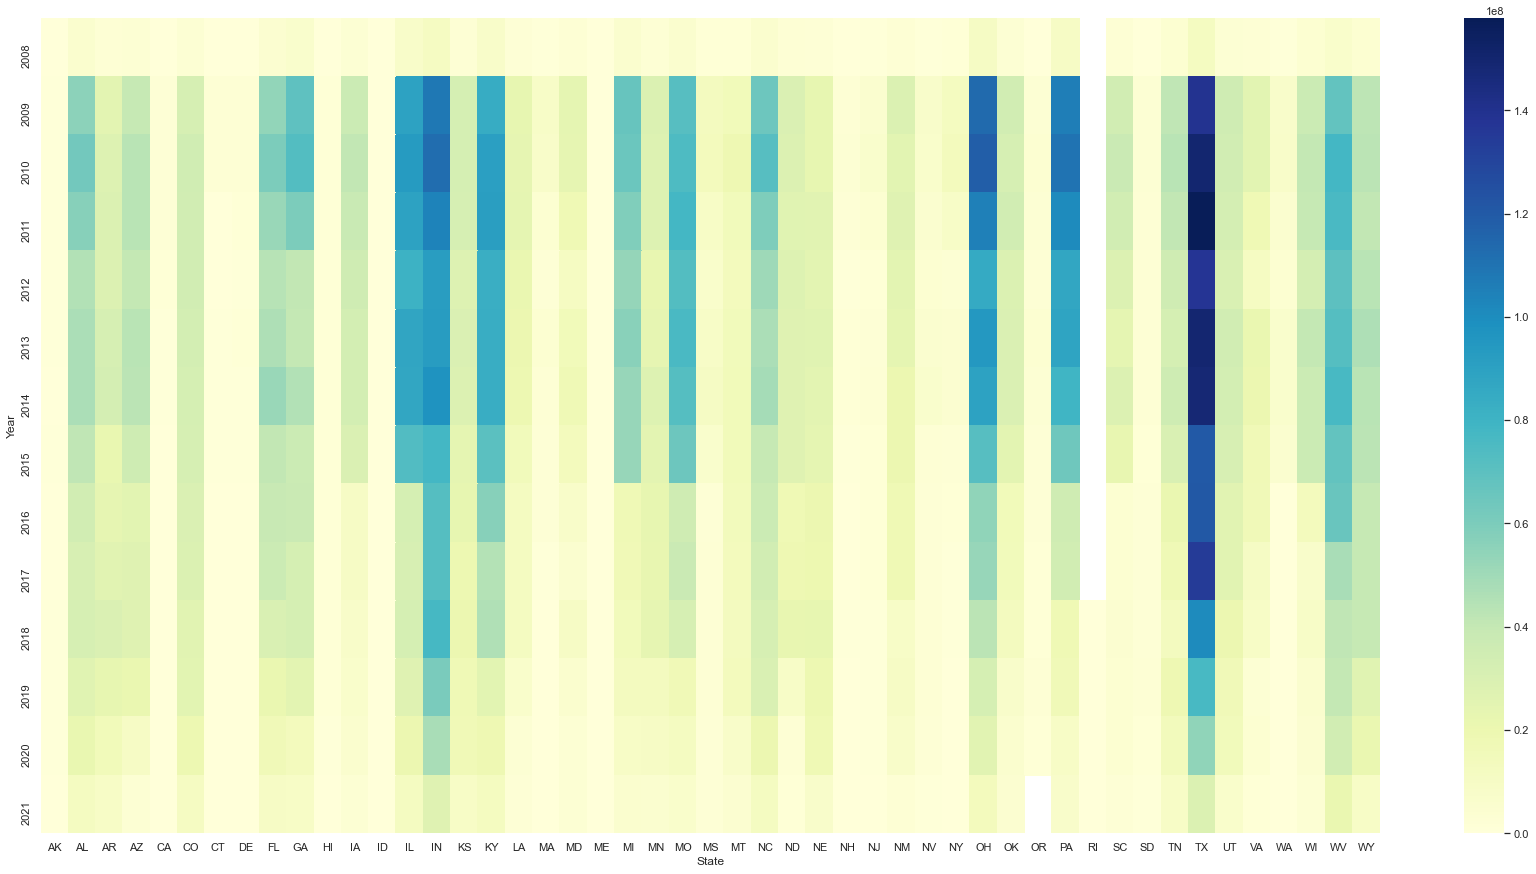

In [433]:
ax = sns.heatmap(prod_states_year,
                 cmap="YlGnBu")
plot.set_ylabel('Year', size = 30)
plot.set_xlabel('State', size = 30)
plot.set_title('Production per State USA', size = 36)

In [330]:
df_tool_ = df_panel.groupby(['Year','Month','State']).mean().reset_index()[['Year','Month','State','Production_GWh']]
df_tool_['Time'] = df_tool_.apply(lambda x : convert_time(x),axis=1)
df_tool_ = df_tool_.where((df_tool_.State == 'CA') | (df_tool.State == 'MA')).dropna()
plot_price_states = df_tool_[['Time','State','Production_GWh']]

Text(0.5, 1.0, 'USA Production of Coal')

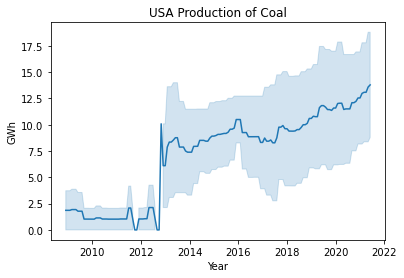

In [332]:
plot = sns.lineplot(x = 'Time', y = 'CO2_prices', data = plot_price_states)
plot.set_ylabel('GWh')
plot.set_xlabel('Year')
plot.set_title('USA Production of Coal')

 # Right Variables: Prices

Text(0.5, 1.0, 'CO2 Prices USA')

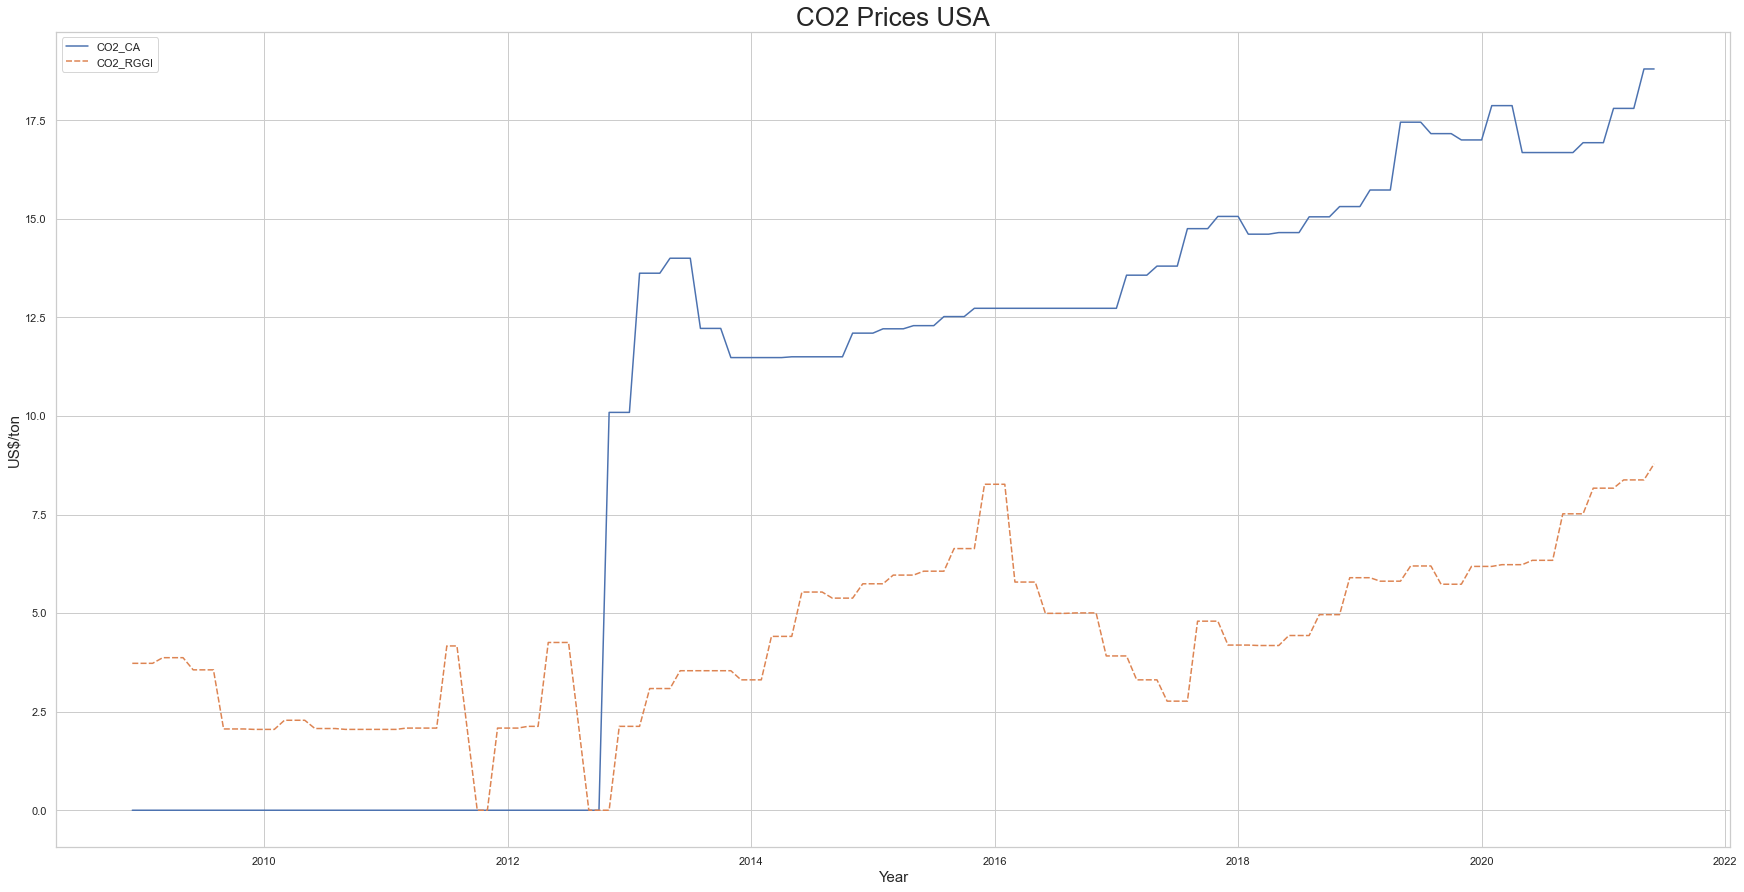

In [437]:
plot = sns.lineplot(data = df_plot.set_index('Time')[['CO2_CA','CO2_RGGI']])
plot.set_ylabel('US$/ton', size =15)
plot.set_xlabel('Year', size = 15)
plot.set_title('CO2 Prices USA', size = 26)

In [384]:
df_panel.columns

Index(['Year', 'Month', 'Plant_Id', 'State', 'Mover_Code', 'Fuel_Code',
       'Coal_prices', 'Gas_prices', 'CO2_prices', 'Production_GWh',
       'Demand_GWh', 'Wind_Production_GWh', 'Solar_Production_GWh', 'YYYYMM',
       'Time'],
      dtype='object')

In [385]:
df_tool = df_panel.groupby(['Year','Month','State']).mean().reset_index()[['Year','Month','State','Gas_prices','Coal_prices']]
df_tool['Time'] = df_tool.apply(lambda x : convert_time(x),axis=1)
plot_prices = df_tool[['Time','State','Coal_prices','Gas_prices']]

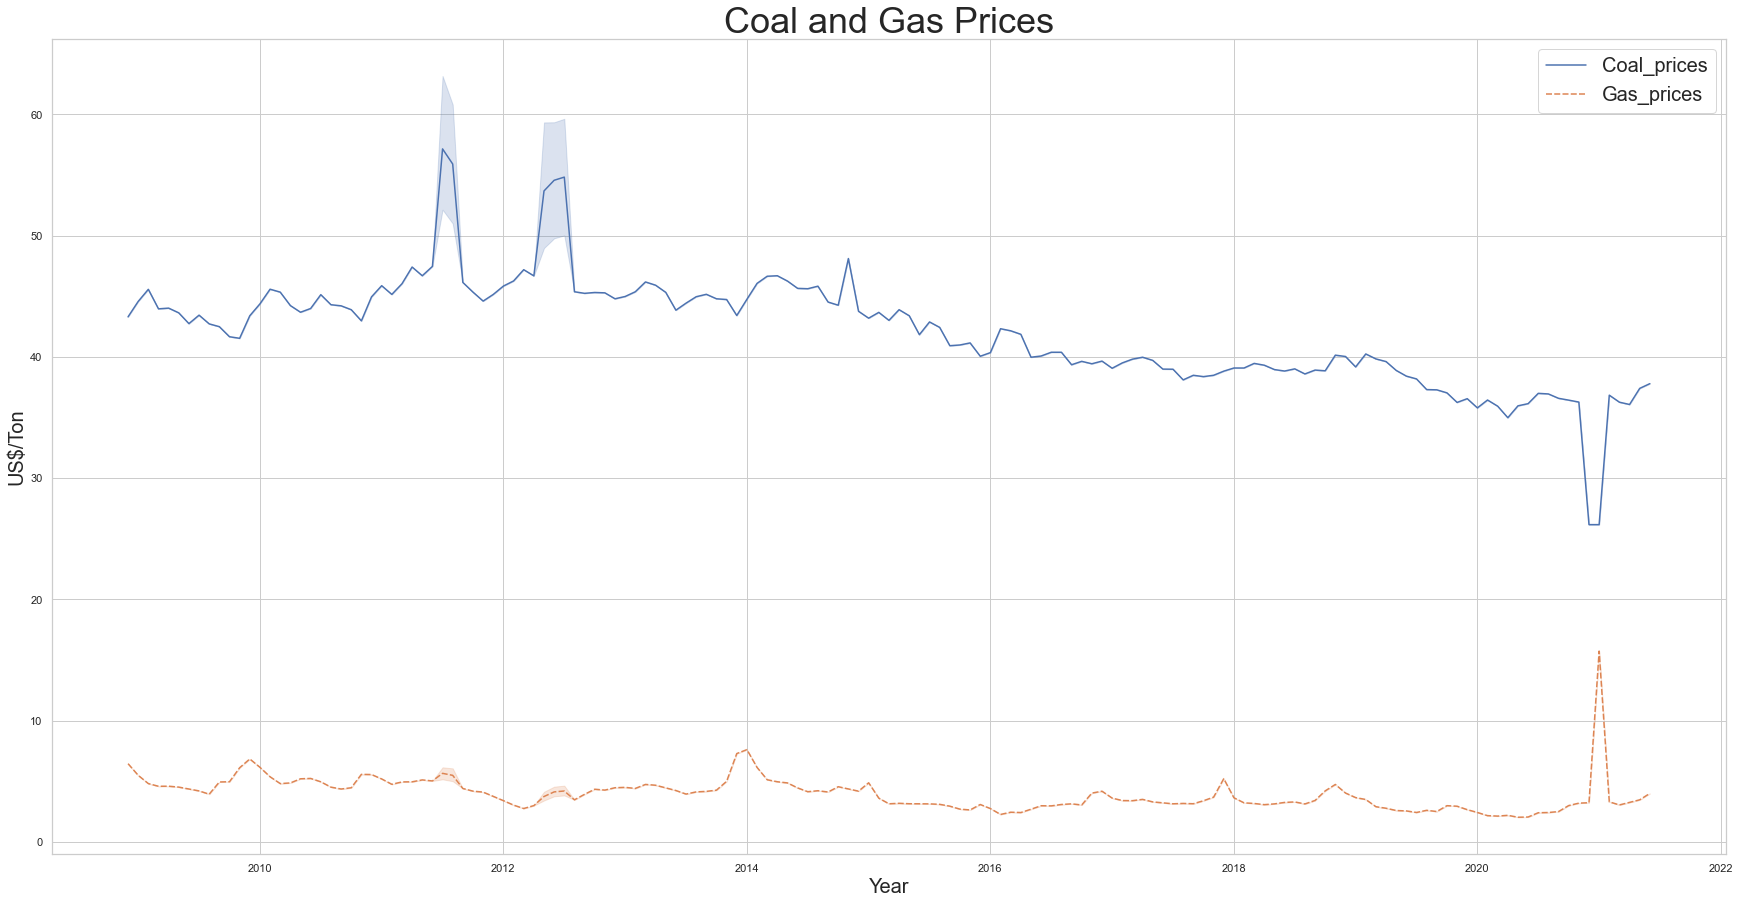

In [434]:
plot = sns.lineplot(data = plot_prices.set_index('Time'))
plot.set_ylabel('US$/Ton', size = 20)b
plot.set_xlabel('Year', size = 20)
plot.set_title('Coal and Gas Prices', size = 36)
plt.legend(loc="upper right", frameon=True, fontsize=20)

# Right Variables: Renewable Production

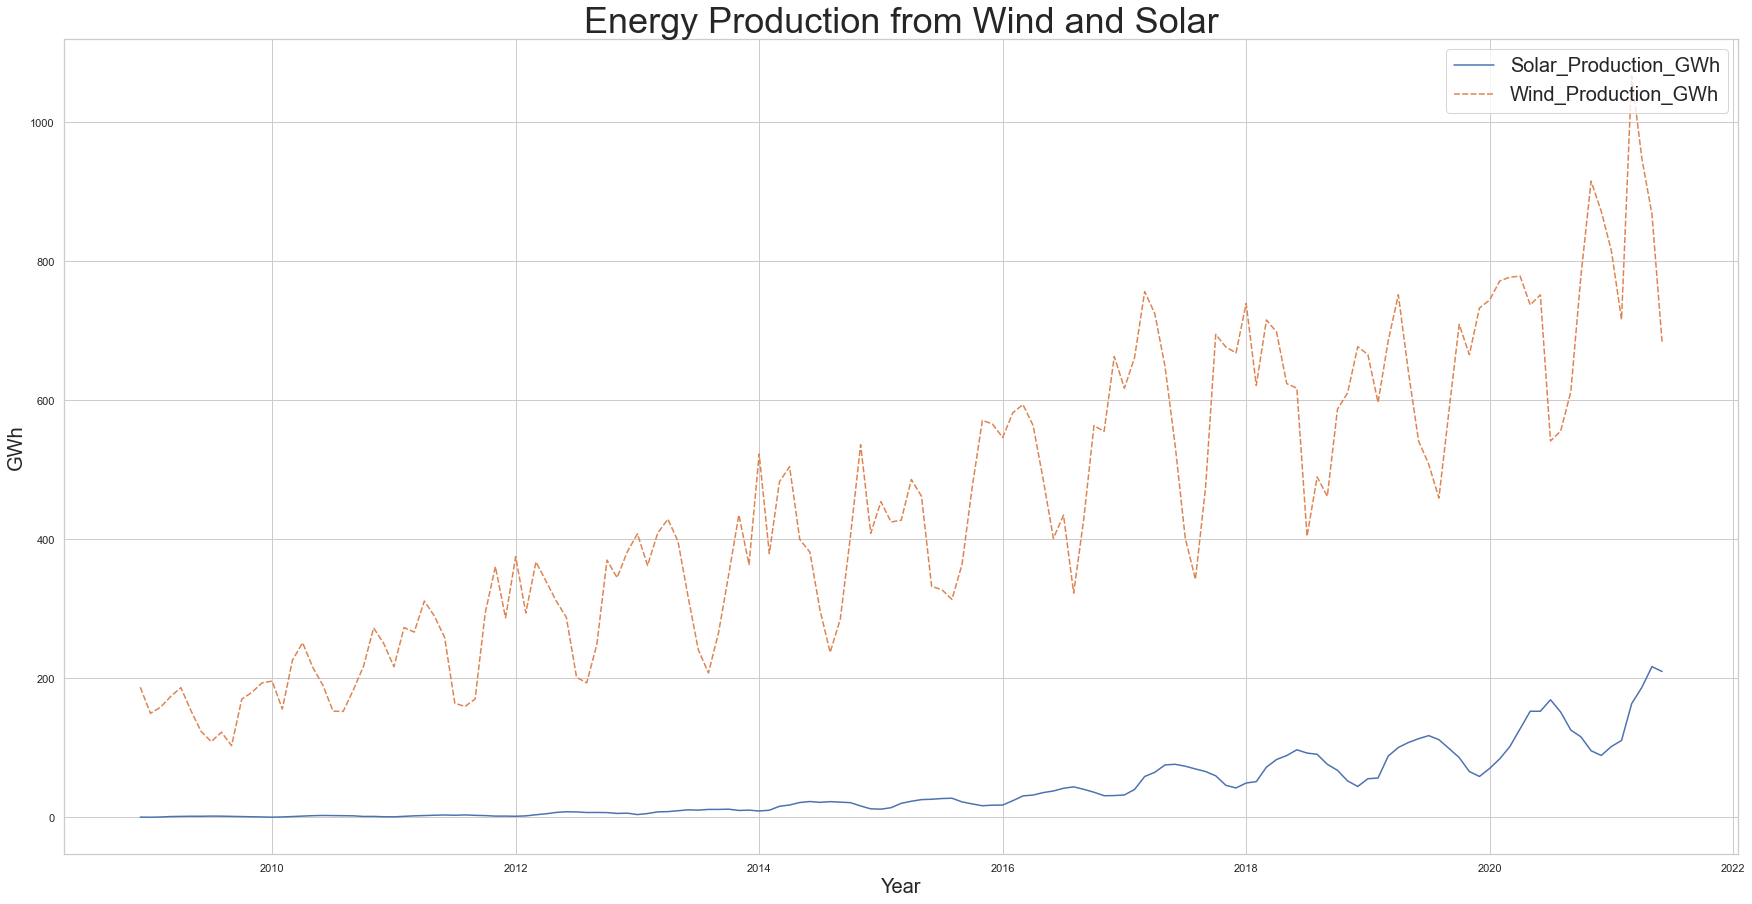

In [443]:
plot = sns.lineplot(data = df_plot.set_index('Time')[['Solar_Production_GWh','Wind_Production_GWh']])
plot.set_ylabel('GWh', size = 20)
plot.set_xlabel('Year', size = 20)
plot.set_title('Energy Production from Wind and Solar', size = 36)
plt.legend(loc="upper right", frameon=True, fontsize=20)

# Capacity

In [519]:
coal_capacity=pd.read_csv('treated_data/Capacity/capacity_coal_interpolated.csv',sep=';').drop('Unnamed: 0',axis=1)

In [520]:
coal_capacity['Time']= coal_capacity.apply(lambda x : convert_time(x),axis=1)

No handles with labels found to put in legend.


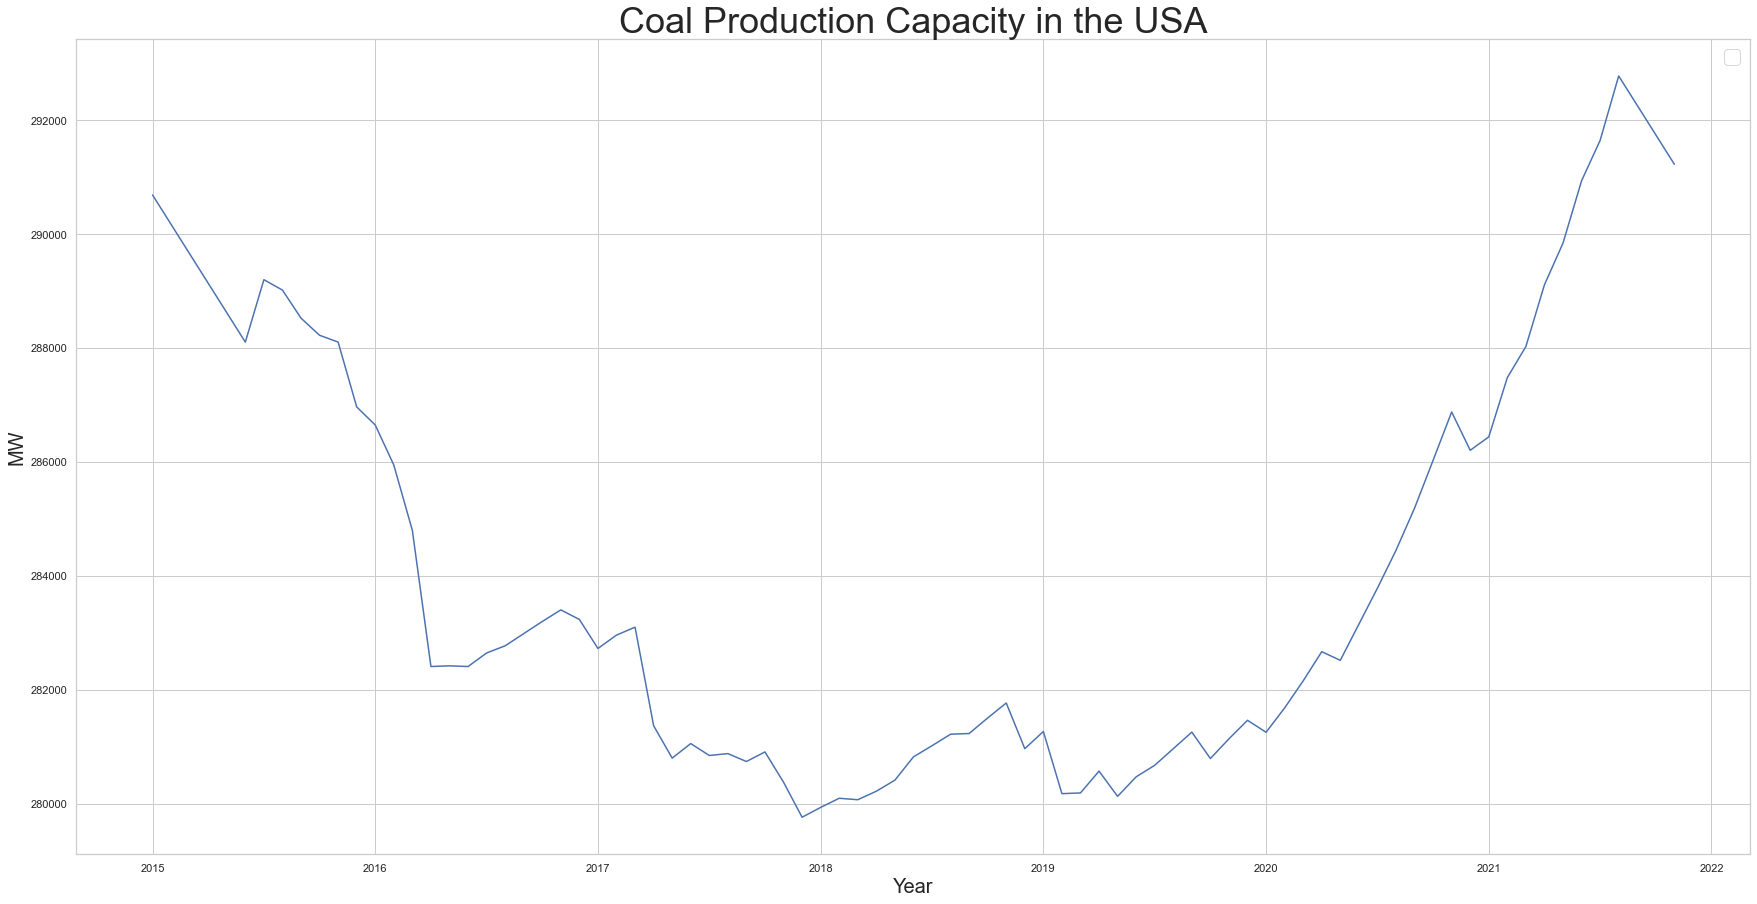

In [524]:
plot = sns.lineplot(data = coal_capacity.groupby('Time').sum().Capacity_MW)
plot.set_ylabel('MW', size = 20)
plot.set_xlabel('Year', size = 20)
plot.set_title('Coal Production Capacity in the USA', size = 36)
plt.legend(loc="upper right", frameon=True, fontsize=20)

In [600]:
coal_capacity_2008 = pd.read_csv('treated_data/Capacity/capacity_coal_interpolated_2008_2021.csv',sep = ';').drop('Unnamed: 0',axis = 1)

No handles with labels found to put in legend.


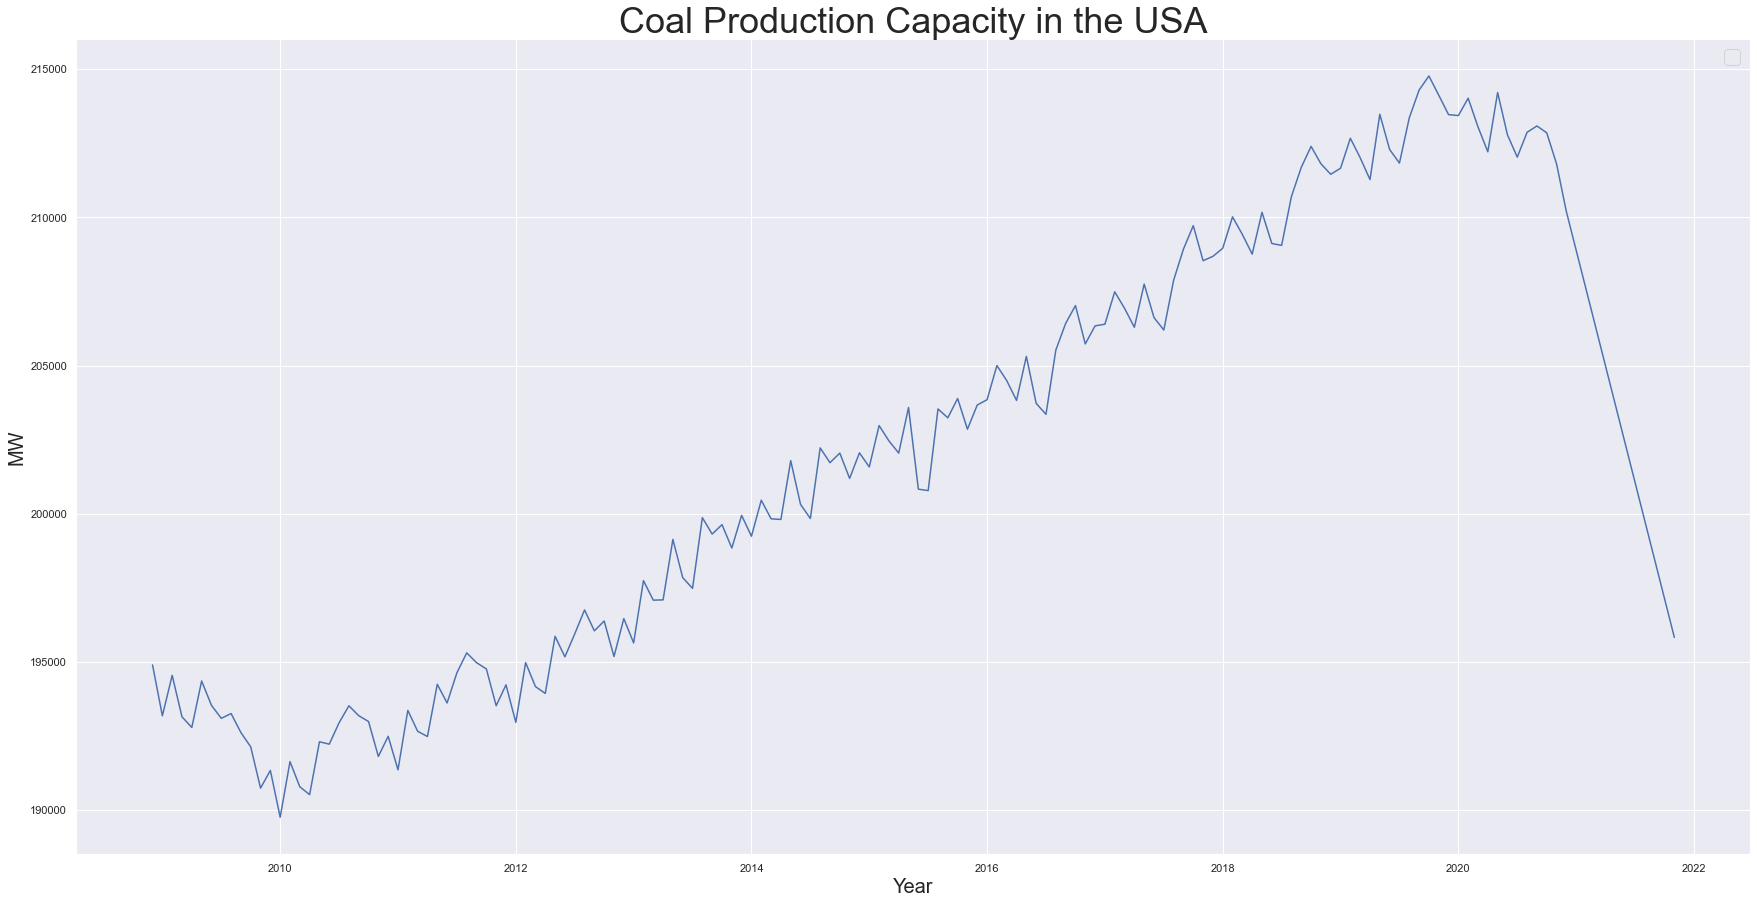

In [601]:
coal_capacity_2008['Time']= coal_capacity_2008.apply(lambda x : convert_time(x),axis=1)
plot = sns.lineplot(data = coal_capacity_2008.groupby('Time').sum().Capacity_MW)
plot.set_ylabel('MW', size = 20)
plot.set_xlabel('Year', size = 20)
plot.set_title('Coal Production Capacity in the USA', size = 36)
plt.legend(loc="upper right", frameon=True, fontsize=20)

No handles with labels found to put in legend.


(100000.0, 220000.0)

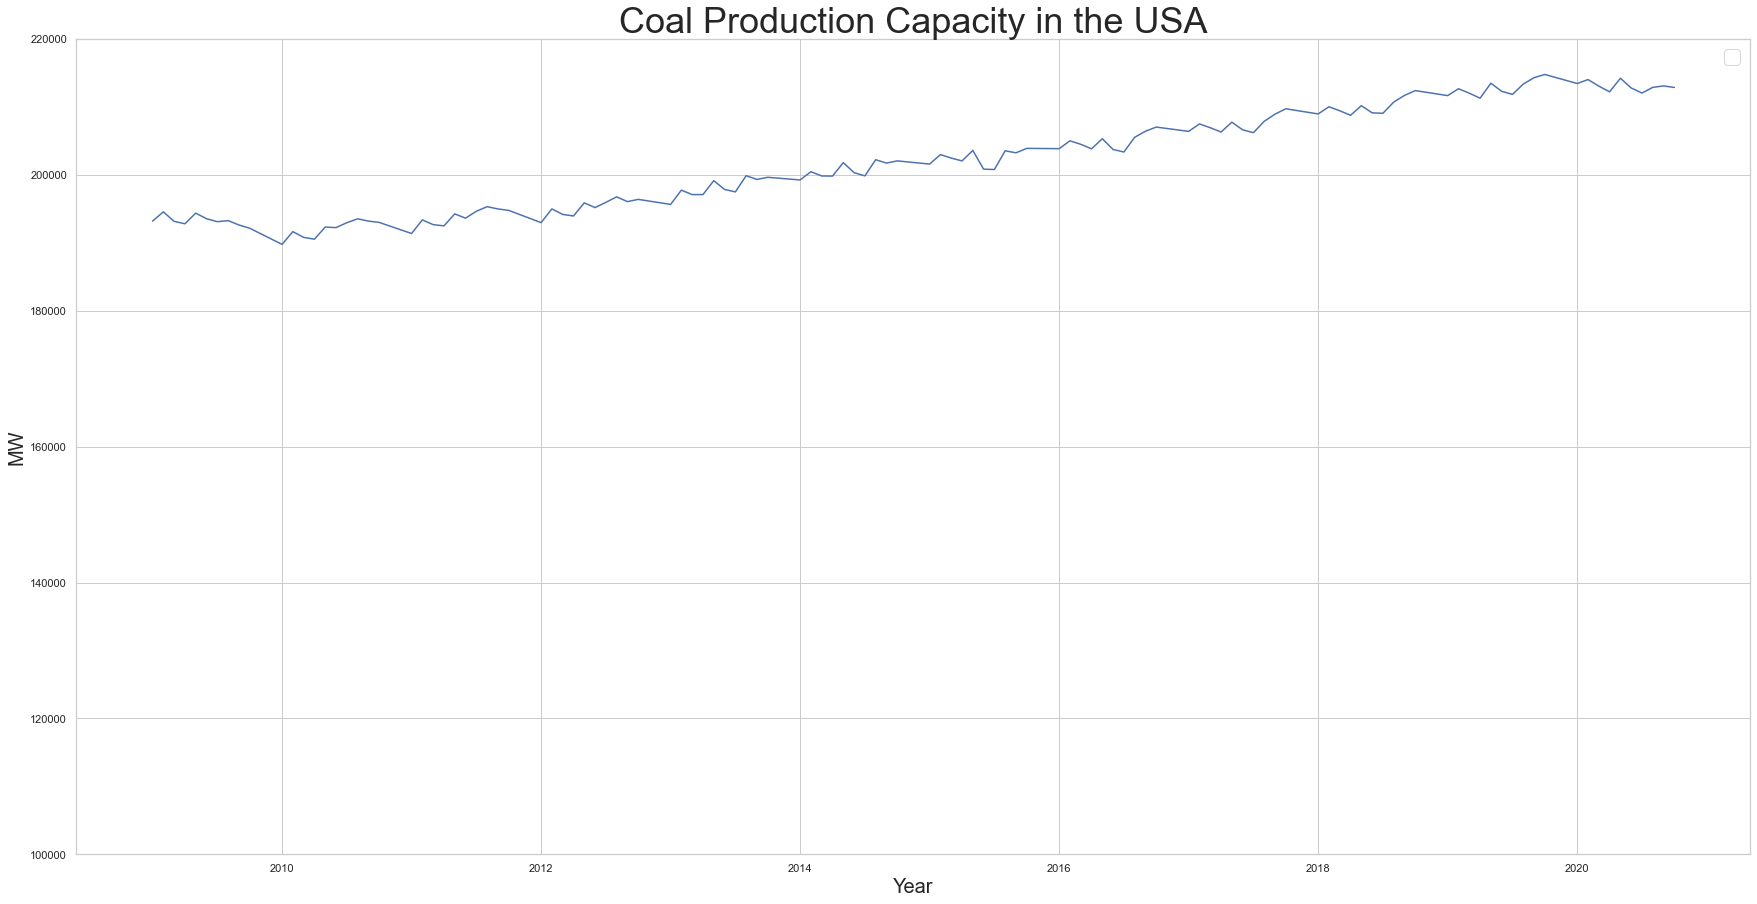

In [544]:
coal_capacity_2008['Time']= coal_capacity_2008.apply(lambda x : convert_time(x),axis=1)
capacity_plot = coal_capacity_2008.where((coal_capacity_2008.Year<2021) &(coal_capacity_2008.Month<=10))
plot = sns.lineplot(data = capacity_plot.groupby('Time').sum().Capacity_MW)
plot.set_ylabel('MW', size = 20)
plot.set_xlabel('Year', size = 20)
plot.set_title('Coal Production Capacity in the USA', size = 36)
plt.legend(loc="upper right", frameon=True, fontsize=20)
plt.ylim(100000, 220000)

In [565]:
coal_capacity = pd.read_csv('treated_data/Capacity/capacity_coal_interpolated_2008_2021.csv',sep = ';').groupby(['Year','Month']).sum().reset_index()
wind_capacity = pd.read_csv('treated_data/Capacity/capacity_wind_interpolated_2008_2021.csv',sep = ';').groupby(['Year','Month']).sum().reset_index()
gas_capacity = pd.read_csv('treated_data/Capacity/capacity_natural gas_interpolated_2008_2021.csv',sep = ';').groupby(['Year','Month']).sum().reset_index()
solar_capacity = pd.read_csv('treated_data/Capacity/capacity_solar_interpolated_2008_2021.csv',sep = ';').groupby(['Year','Month']).sum().reset_index()

df_capacity = pd.DataFrame()
df_capacity[['Year','Month','Wind_Capacity_MW']] = wind_capacity[['Year','Month','Capacity_MW']]
df_capacity['Coal_Capacity_MW'] = coal_capacity.Capacity_MW
df_capacity['Gas_Capacity_MW'] = gas_capacity.Capacity_MW
df_capacity['Solar_Capacity_MW']= solar_capacity.Capacity_MW

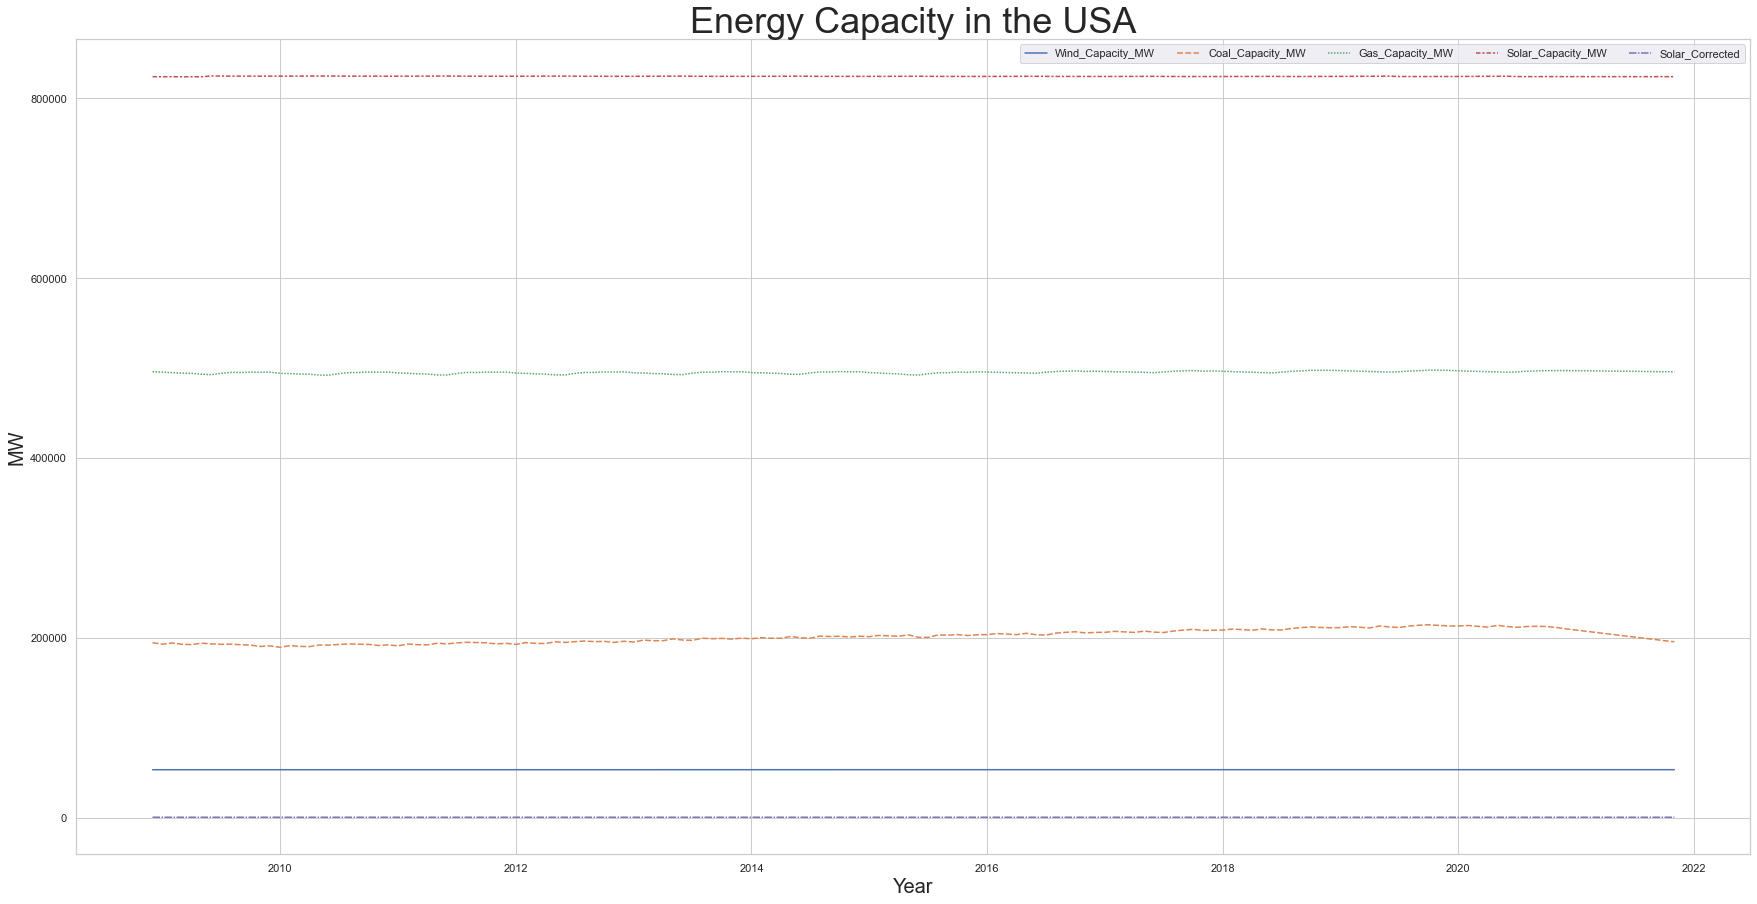

In [599]:
df_capacity['Time']= df_capacity.apply(lambda x : convert_time(x),axis=1)
df_plot = df_capacity.drop(['Year','Month'],axis = 1).set_index('Time')
df_plot['Solar_Corrected'] = df_plot['Solar_Capacity_MW']/1000

sns.set(style="whitegrid")
plot = sns.lineplot(data = df_plot)
sns.set(rc={'figure.figsize':(30,15)})
plot.set_ylabel('MW', size = 20)
plot.set_xlabel('Year', size = 20)
plot.set_title('Energy Capacity in the USA', size = 36)
plot.legend(ncol=5) # you can specify any location parameter you want here

In [574]:
df_plot

,Wind_Capacity_MW,Coal_Capacity_MW,Gas_Capacity_MW,Solar_Capacity_MW
Time,,,,
2008.916667,53658.897921,194899.973321,496292.023746,824144.579628
2009.000000,53659.324615,193184.076822,495575.444511,824140.237860
2009.083333,53652.179180,194547.873636,495092.701048,824128.329256
2009.166667,53645.033745,193150.259999,494561.960249,824096.170384
2009.250000,53637.888310,192790.673710,494314.695074,824064.011512
...,...,...,...,...
2021.500000,53695.264453,201052.482456,496521.336480,824204.788466
2021.583333,53695.691147,199746.540629,496395.333933,824200.446699
2021.666667,53696.117840,198440.598802,496269.331386,824196.104931


# Capacity Factor

In [627]:
left = df_plot_production.reset_index().drop('index',axis=1)
right = df_plot
panel = left.join(right, on = 'Time', how = 'left')

## Coal

In [629]:
panel.columns

Index(['Time', 'Coal_prices', 'Gas_prices', 'Demand_GWh',
       'Solar_Production_GWh', 'Wind_Production_GWh', 'Production_GWh',
       'CO2_CA', 'CO2_RGGI', 'Wind_Capacity_MW', 'Coal_Capacity_MW',
       'Gas_Capacity_MW', 'Solar_Capacity_MW', 'Solar_Corrected'],
      dtype='object')

In [630]:
df_coal = panel[['Time','Production_GWh','Coal_Capacity_MW']]

In [635]:
def capacity_factor(x):
    prod = x.Production_GWh
    cap = x.Coal_Capacity_MW
    return(100* prod/ (cap*30*24/1000))
df_coal['Capacity_Factor(%)']= df_coal.apply(lambda x: capacity_factor(x),axis=1)

<ipython-input-635-225abc01811a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coal['Capacity_Factor(%)']= df_coal.apply(lambda x: capacity_factor(x),axis=1)


In [636]:
df_coal

,Time,Production_GWh,Coal_Capacity_MW,Capacity_Factor(%)
0,2008.916667,1.677843e+08,194899.973321,119565.821202
1,2009.000000,1.719252e+08,193184.076822,123604.872074
2,2009.083333,1.409158e+08,194547.873636,100600.620329
3,2009.166667,1.355303e+08,193150.259999,97456.025369
4,2009.250000,1.259350e+08,192790.673710,90725.179557
...,...,...,...,...
146,2021.083333,6.001972e+07,207582.191592,40157.933705
147,2021.166667,3.982757e+07,206276.249765,26816.498927
148,2021.250000,3.459275e+07,204970.307938,23440.215956
149,2021.333333,4.283792e+07,203664.366110,29213.317009


# Gas production per State

In [642]:
panel = pd.read_csv('Data_Treatment/treated_data/Panel/panel_prod_quant.csv', sep = ';').drop('Unnamed: 0', axis = 1)

In [644]:
df_tool = panel.groupby(['Time','State']).sum().reset_index()[['Time','State','Gas_Production_GWh']]
df_tool = df_tool[['Time','State','Gas_Production_GWh']]
plot_prod_states = df_tool.pivot(index='Time', columns='State')['Gas_Production_GWh']

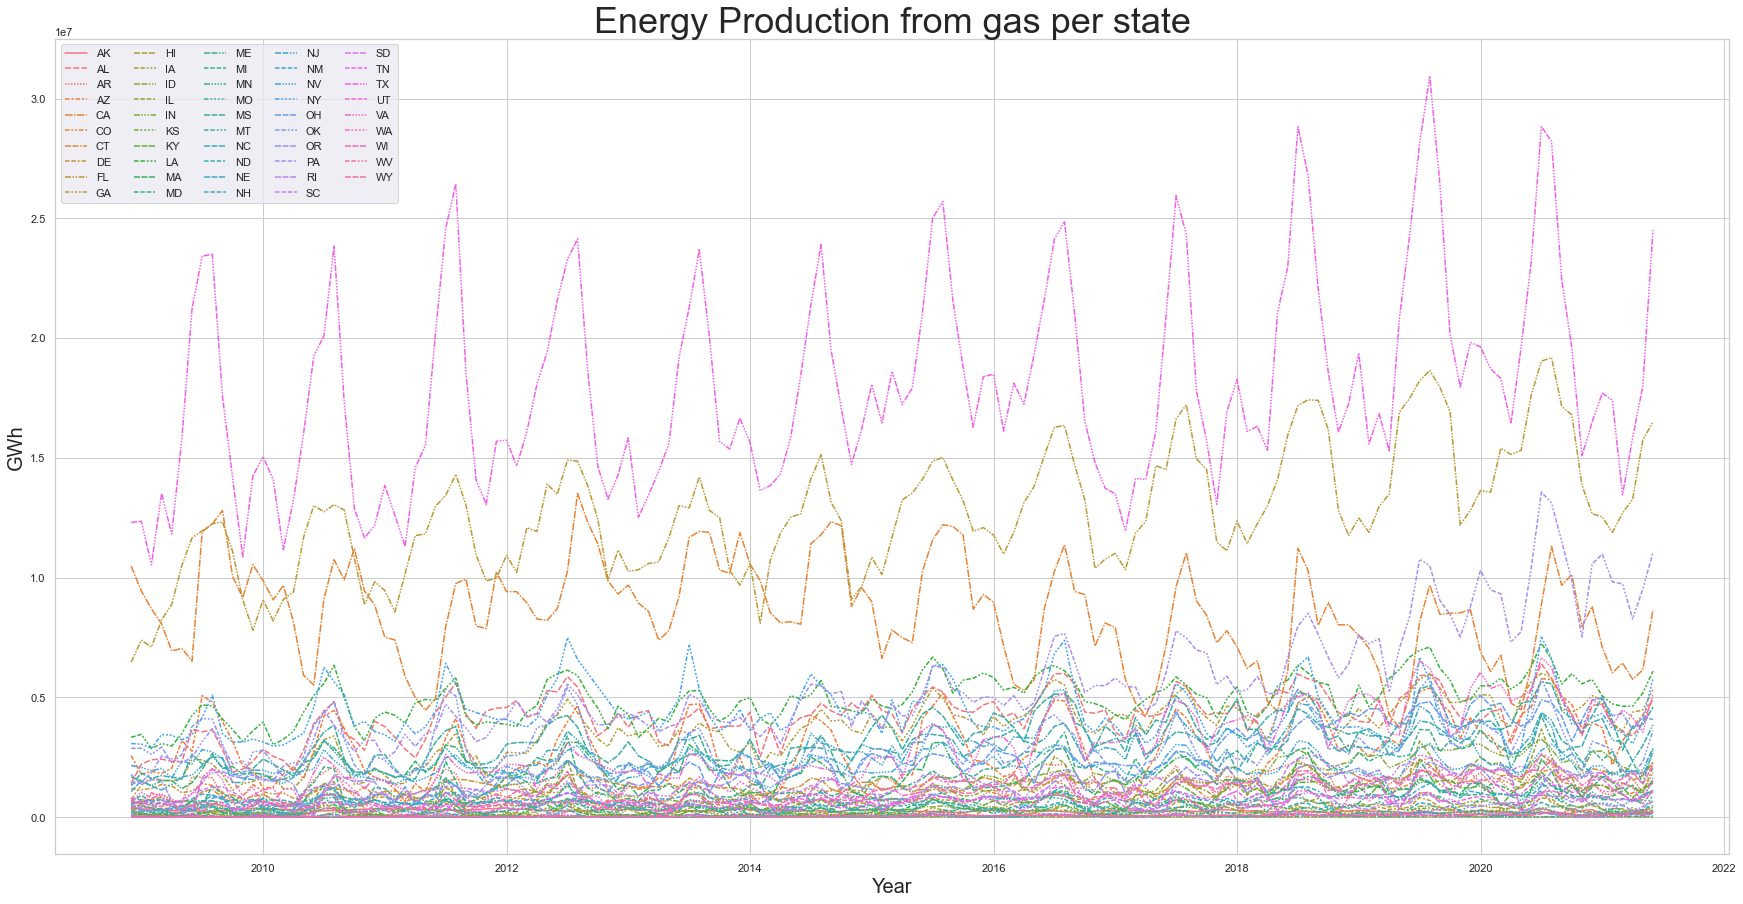

In [645]:
sns.set(style="whitegrid")
plot = sns.lineplot(data = plot_prod_states)
sns.set(rc={'figure.figsize':(30,15)})
plot.set_ylabel('GWh', size = 20)
plot.set_xlabel('Year', size = 20)
plot.set_title('Energy Production from gas per state', size = 36)

plot.legend(ncol=5) # you can specify any location parameter you want here